In [5]:
import pandas as pd
from sqlalchemy import create_engine

## Uploading Data

In [6]:
csv_file = "../Data/divorce.csv"
divorce_df = pd.read_csv(csv_file)
divorce_df.head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


## Transforming Data for Tableau
 Replacing numberic data with their text values for ease of use in Tableau.

In [7]:
df1 = divorce_df.replace([0, 1, 2, 3, 4], ["Never", "Seldom", "Averagely", "Frequently", "Always"])
df2 = df1.replace({"Class":"Seldom"}, "Divorced")
df3 = df2.replace({"Class":"Never"}, "Married")

df3.to_csv('../Data/updated_df.csv')

# FORECASTING MODELS

## Nearest Neighbors (All Data)

In [8]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [9]:
y = divorce_df["Class"]
target_names = ["Married", "Divorced"]

In [10]:
X = divorce_df.drop("Class", axis=1)
X.head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54
0,2,2,4,1,0,0,0,0,0,0,...,3,2,1,3,3,3,2,3,2,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,2,3,4,4,4,4,2,2
2,2,2,2,2,1,3,2,1,1,2,...,2,3,2,3,1,1,1,2,2,2
3,3,2,3,2,3,3,3,3,3,3,...,3,2,2,3,3,3,3,2,2,2
4,2,2,1,1,1,1,0,0,0,0,...,2,2,1,2,3,2,2,2,1,0


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

k: 1, Train/Test Score: 1.000/0.977
k: 3, Train/Test Score: 0.976/0.977
k: 5, Train/Test Score: 0.976/0.977
k: 7, Train/Test Score: 0.976/0.977
k: 9, Train/Test Score: 0.976/0.977
k: 11, Train/Test Score: 0.976/0.977
k: 13, Train/Test Score: 0.976/0.977
k: 15, Train/Test Score: 0.976/0.977
k: 17, Train/Test Score: 0.976/0.977
k: 19, Train/Test Score: 0.976/0.977


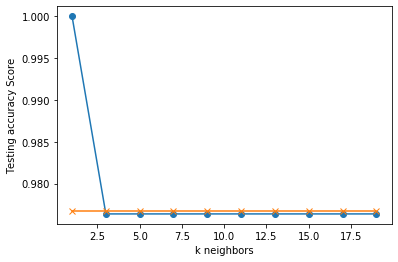

In [12]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [13]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test, y_test))

k=13 Test Acc: 0.977


In [14]:
y_pred = knn.predict(X_test)
print('Accuracy of knn on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of knn on test set: 0.98


In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=["divorced", "married"]))

              precision    recall  f1-score   support

    divorced       0.95      1.00      0.98        20
     married       1.00      0.96      0.98        23

    accuracy                           0.98        43
   macro avg       0.98      0.98      0.98        43
weighted avg       0.98      0.98      0.98        43



## Nearest Neighbors (Top Five Features from Our Findings)

In [16]:
feature_importance_df = divorce_df[['Atr9', 'Atr18', 'Atr40', 'Atr11', 'Atr20', 'Class']].copy()
feature_importance_df.head()

,Atr9,Atr18,Atr40,Atr11,Atr20,Class
0,0,0,3,1,1,1
1,4,4,4,4,2,1
2,1,3,3,3,2,1
3,3,3,4,4,4,1
4,0,1,1,0,1,1


In [17]:
y2 = feature_importance_df["Class"]
target_names = ["Married", "Divorced"]
X2 = feature_importance_df.drop("Class", axis=1)
X2.head()

,Atr9,Atr18,Atr40,Atr11,Atr20
0,0,0,3,1,1
1,4,4,4,4,2
2,1,3,3,3,2
3,3,3,4,4,4
4,0,1,1,0,1


In [18]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=42)

k: 1, Train/Test Score: 0.992/1.000
k: 3, Train/Test Score: 0.984/1.000
k: 5, Train/Test Score: 0.976/1.000
k: 7, Train/Test Score: 0.976/1.000
k: 9, Train/Test Score: 0.976/1.000
k: 11, Train/Test Score: 0.976/1.000
k: 13, Train/Test Score: 0.976/1.000
k: 15, Train/Test Score: 0.976/1.000
k: 17, Train/Test Score: 0.976/1.000
k: 19, Train/Test Score: 0.976/1.000


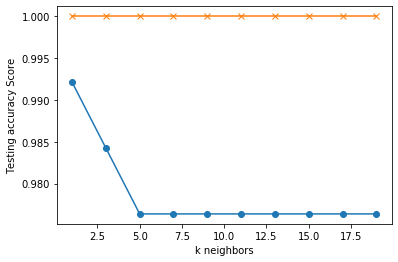

In [19]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores2 = []
test_scores2 = []
for k in range(1, 20, 2):
    knn2 = KNeighborsClassifier(n_neighbors=k)
    knn2.fit(X2_train, y2_train)
    train_score2 = knn2.score(X2_train, y2_train)
    test_score2 = knn2.score(X2_test, y2_test)
    train_scores2.append(train_score2)
    test_scores2.append(test_score2)
    print(f"k: {k}, Train/Test Score: {train_score2:.3f}/{test_score2:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores2, marker='o')
plt.plot(range(1, 20, 2), test_scores2, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [20]:
knn2 = KNeighborsClassifier(n_neighbors=3)
knn2.fit(X2_train, y2_train)
print('k=13 Test Acc: %.3f' % knn2.score(X2_test, y2_test))

k=13 Test Acc: 1.000


In [21]:
y2_pred = knn2.predict(X2_test)
print('Accuracy of knn on test set: {:.2f}'.format(knn2.score(X2_test, y2_test)))

Accuracy of knn on test set: 1.00


In [31]:
from sklearn.metrics import classification_report
print(classification_report(y2_test, y2_pred, target_names=["divorced", "married"]))

              precision    recall  f1-score   support

    divorced       1.00      1.00      1.00        20
     married       1.00      1.00      1.00        23

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



## Nearest Neighbors (Top Five Features from Their Findings)

In [23]:
feature_importance_df = divorce_df[['Atr2', 'Atr6', 'Atr11', 'Atr18', 'Atr26', 'Class']].copy()
feature_importance_df.head()

,Atr2,Atr6,Atr11,Atr18,Atr26,Class
0,2,0,1,0,0,1
1,4,0,4,4,1,1
2,2,3,3,3,2,1
3,2,3,4,3,1,1
4,2,1,0,1,2,1


In [24]:
y3 = feature_importance_df["Class"]
target_names = ["Married", "Divorced"]
X3 = feature_importance_df.drop("Class", axis=1)
X3.head()

,Atr2,Atr6,Atr11,Atr18,Atr26
0,2,0,1,0,0
1,4,0,4,4,1
2,2,3,3,3,2
3,2,3,4,3,1
4,2,1,0,1,2


In [25]:
from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, random_state=42)

k: 1, Train/Test Score: 0.984/1.000
k: 3, Train/Test Score: 0.969/1.000
k: 5, Train/Test Score: 0.969/1.000
k: 7, Train/Test Score: 0.969/1.000
k: 9, Train/Test Score: 0.976/1.000
k: 11, Train/Test Score: 0.976/1.000
k: 13, Train/Test Score: 0.976/1.000
k: 15, Train/Test Score: 0.976/1.000
k: 17, Train/Test Score: 0.976/1.000
k: 19, Train/Test Score: 0.976/1.000


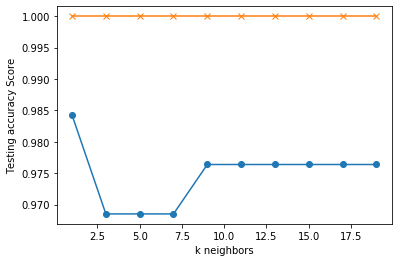

In [26]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores3 = []
test_scores3 = []
for k in range(1, 20, 2):
    knn3 = KNeighborsClassifier(n_neighbors=k)
    knn3.fit(X3_train, y3_train)
    train_score3 = knn3.score(X3_train, y3_train)
    test_score3 = knn3.score(X3_test, y3_test)
    train_scores3.append(train_score3)
    test_scores3.append(test_score3)
    print(f"k: {k}, Train/Test Score: {train_score3:.3f}/{test_score3:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores3, marker='o')
plt.plot(range(1, 20, 2), test_scores3, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [27]:
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X3_train, y3_train)
print('k=13 Test Acc: %.3f' % knn3.score(X3_test, y3_test))

k=13 Test Acc: 1.000


In [28]:
y3_pred = knn3.predict(X3_test)
print('Accuracy of knn on test set: {:.2f}'.format(knn3.score(X3_test, y3_test)))

Accuracy of knn on test set: 1.00


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y3_test, y3_pred, target_names=["divorced", "married"]))

              precision    recall  f1-score   support

    divorced       1.00      1.00      1.00        20
     married       1.00      1.00      1.00        23

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43

